In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
  

In [2]:
# read original image 
image = cv2.imread("RBC-stained.png") 
  
# convet to gray scale image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.imwrite('gray.png', gray) 
  
# apply median filter for smoothning 
blurM = cv2.medianBlur(gray, 5) 
cv2.imwrite('blurM.png', blurM) 
  
# apply gaussian filter for smoothning 
blurG = cv2.GaussianBlur(gray, (9, 9), 0) 
cv2.imwrite('blurG.png', blurG) 
  
# histogram equalization 
histoNorm = cv2.equalizeHist(gray) 
cv2.imwrite('histoNorm.png', histoNorm) 
  
# create a CLAHE object for  
# Contrast Limited Adaptive Histogram Equalization (CLAHE)  
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8)) 
claheNorm = clahe.apply(gray) 
cv2.imwrite('claheNorm.png', claheNorm) 
  
  
#contrast stretching  
# Function to map each intensity level to output intensity level.  
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1) * pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2 
  

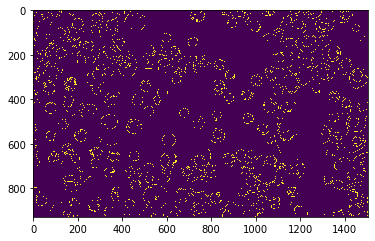

In [3]:
 # Define parameters.  
  
  
r1 = 70
s1 = 0
r2 = 200
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array.  
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching.  
contrast_stretched = pixelVal_vec(gray, r1, s1, r2, s2) 
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2) 
  
cv2.imwrite('contrast_stretch.png', contrast_stretched) 
cv2.imwrite('contrast_stretch_blurM.png',  
            contrast_stretched_blurM) 
  
# edge detection using canny edge detector 
edge = cv2.Canny(gray, 100, 200) 
cv2.imwrite('edge.png', edge) 
image1= mpimg.imread('edge.png')
plt.imshow(image1)

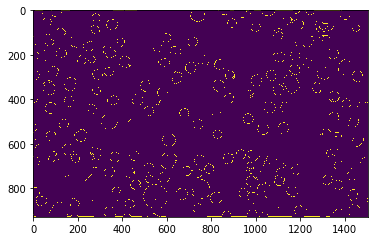

In [4]:
edgeG = cv2.Canny(blurG, 100, 200) 
cv2.imwrite('edgeG.png', edgeG) 
image2= mpimg.imread('edgeG.png')
plt.imshow(image2)


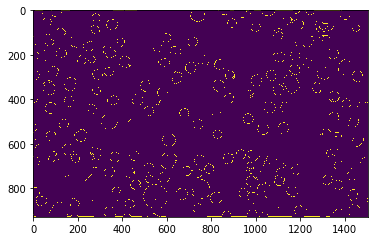

In [5]:


edgeM = cv2.Canny(blurM, 100, 200) 
cv2.imwrite('edgeM.png', edgeM) 
image3= mpimg.imread('edgeG.png')
plt.imshow(image3)

In [ ]:
# read enhanced image  
img = cv2.imread('edgeG.png', 0) 
  
# morphological operations 
kernel = np.ones((5, 5), np.uint8) 
dilation = cv2.dilate(img, kernel, iterations = 1) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 
  
# Adaptive thresholding on mean and gaussian filter 
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2) 
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2) 
# Otsu's thresholding 
ret4, th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
  
# Initialize the list 
Cell_count, x_count, y_count = [], [], [] 
  
# read original image, to display the circle and center detection   
display = cv2.imread("gray.png") 
  
# hough transform with modified circular parameters 
circles=cv2.HoughCircles(th4, cv2.HOUGH_GRADIENT,1.2,20, param1=50,param2=28,minRadius=1,maxRadius=50)

  
# circle detection and labeling using hough transformation  
if circles is not None: 
        # convert the (x, y) coordinates and radius of the circles to integers 
        circles = np.round(circles[0, :]).astype("int") 
  
        # loop over the (x, y) coordinates and radius of the circles 
        for (x, y, r) in circles: 
  
                cv2.circle(display, (x, y), r, (0, 255, 0), 2) 
                cv2.rectangle(display, (x - 2, y - 2),  
                              (x + 2, y + 2), (0, 128, 255), -1) 
                Cell_count.append(r) 
                x_count.append(x) 
                y_count.append(y) 
       
    
    # show the output image 
        cv2.imshow("gray", display) 
        cv2.waitKey(0) 
  

 #display the count of blue cells  
print(len(Cell_count)) 
